# EE399 HW2
## Ziwen


https://github.com/ZiwenLi0325/EE399.git

In [284]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.io import loadmat
results = loadmat('yalefaces.mat')
X=results['X']
print(X.shape)

(1024, 2414)


# (a)

Text(0, 0.5, 'j')

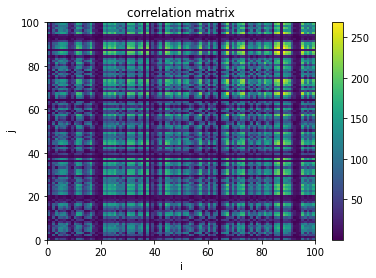

In [285]:
# print(first_100.shape)
C = np.zeros([100,100])
for i in range(100):
    for j in range(100):
        C[i,j] = np.dot(X[:,i],X[:,j])
# print(C)
# print(C.shape)
plt.pcolor(C)
plt.colorbar()
plt.title("correlation matrix")
plt.xlabel("i")
plt.ylabel("j")

# (b)

The index i,j with the largest entry is (88, 88)
The index i,j with the largest entry is (86, 88)


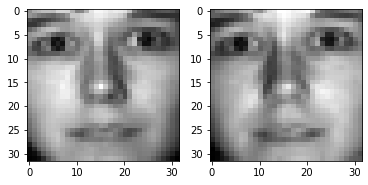

In [286]:
C_remove = C.copy()
# Find the index i,j with the largest entry
i, j = np.unravel_index(C_remove.argmax(), C_remove.shape)

print(f"The index i,j with the largest entry is ({i}, {j})")
np.fill_diagonal(C_remove, 0)

i, j = np.unravel_index(C_remove.argmax(), C_remove.shape)

print(f"The index i,j with the largest entry is ({i}, {j})")
plt.subplot(1,2,1)
print_copy = X[:,86]
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")
plt.subplot(1,2,2)
print_copy = X[:,88]
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")

In [287]:
# Find the index i,j with the smallest entry
small = 100
for i in range(100):
    for j in range(100):
        if C[i,j] < small and i!=j:
            small = C[i,j] 
            i_index = i
            j_index = j
print(f"The index i,j with the smallest entry is ({i_index}, {j_index})")
print(small)

The index i,j with the smallest entry is (54, 64)
0.002161908881199547


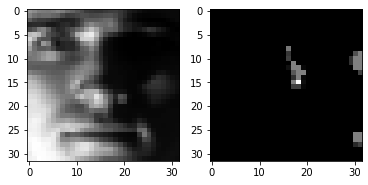

In [288]:
plt.subplot(1,2,1)
print_copy = X[:,54]
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")
plt.subplot(1,2,2)
print_copy = X[:,64]
plt.imshow(print_copy.reshape([32,32]),cmap = "gray")

# (C)

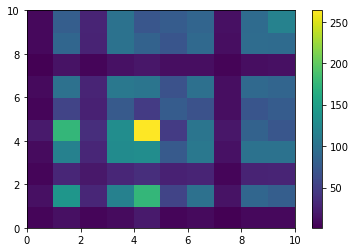

In [289]:
array_index = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005] 
image_set = np.array([X[:,i] for i in array_index])
Y = np.matmul(image_set,np.transpose(image_set))
plt.pcolor(Y)
plt.colorbar()
# print(image_set.shape)
# # print(first_100.shape)
# C = np.zeros([10,10])
# for i in range(10):
#     for j in range(10):
#         C[i,j] = np.dot(image_set[:,i],image_set[:,j])
# # print(C)
# # print(C.shape)
# plt.pcolor(C)
# plt.colorbar()
# plt.title("correlation matrix")
# plt.xlabel("i")
# plt.ylabel("j")

# (d)

In [290]:
Y = np.matmul(X,np.transpose(X))
eigenvalues, eigenvectors = np.linalg.eig(Y)
largest_indices = np.argsort(np.abs(eigenvalues))[::-1][:6]
largest_eigenvectors = eigenvectors[:, largest_indices]
print(eigenvalues[:6])
print(largest_eigenvectors)

[234020.45485389  49038.31530059   8236.53989701   6024.87145793
   2051.49643269   1901.07911482]
[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]


# (e)

In [291]:
# Perform SVD on X
U, s, Vt = np.linalg.svd(X)

# Extract the first six principal components
PCs = Vt[:6, :].T
# Normalize principal components to have unit length
PCs_norm = np.linalg.norm(PCs, axis=0)
PCs = PCs / PCs_norm
print(U[:6, :])
# Show the first six principal components
for i in range(6):
    pc = PCs[:, i]
#     pc_image = np.reshape(pc, (32, 32))
#     plt.imshow(pc_image, cmap='gray')
#     plt.title('Principal Component {}'.format(i+1))
#     plt.show()

[[-0.02384327  0.04535378  0.05653196 ... -0.00238077 -0.0015886
   0.00041024]
 [-0.02576146  0.04567536  0.04709124 ...  0.00265168  0.00886966
  -0.0047811 ]
 [-0.02728448  0.04474528  0.0362807  ... -0.00073077 -0.00706009
   0.00678472]
 [-0.0289902   0.04316163  0.02344727 ... -0.00367797  0.00323748
   0.00077172]
 [-0.03057294  0.04080838  0.00992662 ...  0.00988825 -0.00657576
   0.00607428]
 [-0.03229324  0.03805116 -0.00241627 ... -0.01055232  0.00471235
  -0.00872253]]


# (f)

In [292]:
u_1 = U[:,0]
v_1 = eigenvectors[:,0]
l2_norm = np.sqrt(np.sum(np.square(np.abs(u_1)-np.abs(v_1))))
print("The difference of norm between u_1 and v_1 is "+str(l2_norm)+".")

The difference of norm between u_1 and v_1 is 6.535857028199339e-16.


# (g)

[483.75660704 221.44596474  90.75538495  77.62004546  45.29344801
  43.60136597]
(1024, 1024)


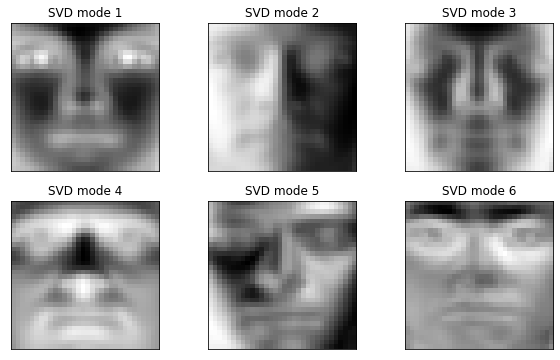

Percentage of variance captured by each mode:
Mode 1: 77.68%
Mode 2: 16.28%
Mode 3: 2.73%
Mode 4: 2.00%
Mode 5: 0.68%
Mode 6: 0.63%


In [293]:
X=results['X']
U, s, Vt = np.linalg.svd(X)
s = s[:6]
print(s)
total_var = np.sum(s**2)

# compute the percentage of variance captured by each mode
var_captured = s**2 / total_var *100

# plot the first 6 SVD modes
fig, axs = plt.subplots(2, 3, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})

print(U.shape)
for i, ax in enumerate(axs.flat):
    ax.imshow(np.reshape(U[:, i], (32, 32)), cmap='gray')
    ax.set_title('SVD mode {}'.format(i+1))

plt.show()

# print the percentage of variance captured by each mode
print('Percentage of variance captured by each mode:')
for i in range(6):
    print('Mode {}: {:.2f}%'.format(i+1, var_captured[i]))